In [3]:
%pip install xgboost

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import joblib

KOI_raw_data = pd.read_csv('Data/KOI_data_cumulative_2025.09.22_07.28.01.csv',skiprows=144)

useless_columns_KOI = [
    'kepid', 'rowid', 'koi_datalink_dvr', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
    'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_disp_prov', 'koi_parm_prov', 'koi_sparprov',
    'koi_vet_stat', 'koi_vet_date', 'koi_comment', 'koi_tce_delivname', 'koi_tce_plnt_num', 'ra', 'dec',
    'koi_quarters', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1',
    'koi_time0_err2', 'koi_limbdark_mod', 'koi_fittype', 'koi_dicco_mra', 'koi_dicco_mra_err', 'koi_dicco_mdec',
    'koi_dicco_mdec_err', 'koi_dicco_msky', 'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err',
    'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky', 'koi_dikco_msky_err', 'koi_fwm_stat_sig', 'koi_fwm_sra',
    'koi_fwm_sra_err', 'koi_fwm_sdec', 'koi_fwm_sdec_err', 'koi_fwm_srao', 'koi_fwm_srao_err', 'koi_fwm_sdeco',
    'koi_fwm_sdeco_err', 'koi_fwm_prao', 'koi_fwm_prao_err', 'koi_fwm_pdeco', 'koi_fwm_pdeco_err', 'koi_period_err1',
    'koi_period_err2', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp_err1', 'koi_longp_err2', 'koi_impact_err1',
    'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_ingress_err1', 'koi_ingress_err2',
    'koi_depth_err1', 'koi_depth_err2', 'koi_ror_err1', 'koi_ror_err2', 'koi_srho_err1', 'koi_srho_err2',
    'koi_prad_err1', 'koi_prad_err2', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq_err1',
    'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_dor_err1', 'koi_dor_err2', 'koi_steff_err1',
    'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad_err1',
    'koi_srad_err2', 'koi_smass_err1', 'koi_smass_err2', 'koi_sage_err1', 'koi_sage_err2', 'koi_sage', 'koi_model_dof',
    'koi_ingress', 'koi_model_chisq', 'koi_longp', 'koi_ldm_coeff4', 'koi_ldm_coeff3', 'koi_trans_mod', 'koi_datalink_dvr',
    'koi_datalink_dvs'
]

  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_KOI = KOI_raw_data.drop(columns=useless_columns_KOI)
df_KOI

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,...,koi_srad,koi_smass,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,CONFIRMED,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,...,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,CONFIRMED,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,...,0.927,0.919,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
2,CANDIDATE,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,...,0.868,0.961,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826
3,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,...,0.791,0.836,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,CONFIRMED,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,...,1.046,1.095,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,0.297633,0.16318,29.35,0.0128,20.78,...,0.903,1.005,14.082,14.082,13.501,13.299,13.177,12.200,11.814,11.756
9560,CANDIDATE,1.739849,0.043,3.11400,48.5,0.006379,0.50770,0.72,0.0290,89.42,...,1.031,1.075,14.757,15.189,14.687,14.571,14.484,13.641,13.339,13.261
9561,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,0.009444,8.97692,1.07,0.0157,88.60,...,1.041,1.104,15.385,15.853,15.347,15.185,15.158,14.220,13.913,13.844
9562,CANDIDATE,333.486169,0.214,3.19900,639.1,0.022590,85.88623,19.30,1.2233,89.98,...,7.824,2.190,10.998,11.733,10.880,10.682,10.578,9.501,9.027,8.921


In [5]:
df_KOI_encoded = pd.get_dummies(df_KOI, columns=['koi_disposition'], dummy_na=False, prefix='state')
imputer = IterativeImputer(max_iter=10, random_state=0)
df_KOI_imputado = pd.DataFrame(imputer.fit_transform(df_KOI_encoded), columns=df_KOI_encoded.columns)
encoded_columns = [c for c in df_KOI_imputado.columns if c.startswith('state_')]
columnas_originales = [c for c in df_KOI_imputado.columns if c not in encoded_columns]
decoded_series = df_KOI_imputado[encoded_columns].idxmax(axis=1)
df_KOI['koi_disposition_imputed'] = decoded_series.str.replace('state_', '')
final_df = df_KOI_imputado[columnas_originales].copy()
final_df['koi_disposition'] = df_KOI['koi_disposition_imputed']

X = final_df.drop('koi_disposition', axis=1)
y_text = final_df['koi_disposition']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_text)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


In [12]:
param_grid = {
    'n_estimators': [400, 600, 800, 1000],
    'max_depth': [4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0.05, 0.1, 0.2]
}
xgb_base = XGBClassifier(random_state=42, eval_metric='mlogloss', tree_method='hist', objective='multi:softprob')
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=65,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 65 candidates, totalling 325 fits


In [ ]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])
param_grid_svm = {
    'svm__C': [0.1, 1, 3, 10, 30, 100, 300],
    'svm__gamma': ['scale', 'auto', 1e-3, 1e-2, 1e-1],
    'svm__kernel': ['rbf']
}
random_search_svm = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=param_grid_svm,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search_svm.fit(X_train, y_train)
best_svm_model = random_search_svm.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [14]:
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=2000, early_stopping=True, random_state=42))
])
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (64, 64), (128, 64), (128, 128)],
    'mlp__alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'mlp__learning_rate_init': [1e-4, 5e-4, 1e-3, 5e-3],
    'mlp__activation': ['relu', 'tanh']
}
random_search_mlp = RandomizedSearchCV(
    estimator=mlp_pipeline,
    param_distributions=param_grid_mlp,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search_mlp.fit(X_train, y_train)
best_mlp_model = random_search_mlp.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Accuracy: 0.8474
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       396
           1       0.85      0.88      0.86       549
           2       0.88      0.91      0.89       968

    accuracy                           0.85      1913
   macro avg       0.83      0.81      0.82      1913
weighted avg       0.84      0.85      0.85      1913

[[262  48  86]
 [ 37 481  31]
 [ 55  35 878]]


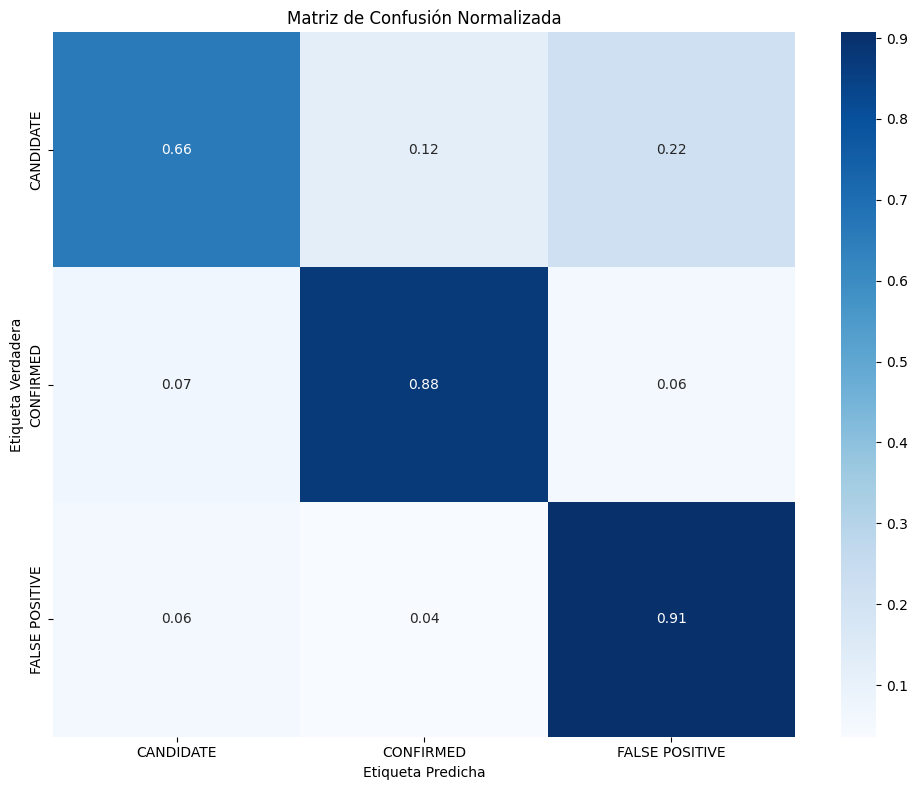

In [15]:
meta_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
stacking_model = StackingClassifier(
    estimators=[('xgb', best_xgb_model), ('svm', best_svm_model), ('mlp', best_mlp_model)],
    final_estimator=meta_model,
    stack_method='predict_proba',
    passthrough=False,
    cv=5,
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)
joblib.dump(stacking_model, 'exoplanet_stacking_model.pkl')

y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

class_names = label_encoder.classes_
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.title('Matriz de Confusión Normalizada')
plt.tight_layout()
plt.show()